In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ot
import os
import sys

# Read in the data
df40 = pd.read_csv('data/station_40.csv', index_col=0)
df49 = pd.read_csv('data/station_49.csv', index_col=0)
df63 = pd.read_csv('data/station_63.csv', index_col=0)
df80 = pd.read_csv('data/station_80.csv', index_col=0)

df40

,W_1,W_2,W_3,W_4,W_5,W_6,W_7,W_8,W_9,W_10,W_11,W_12,W_13,W_14,W_15,W_16,W_17,W_18,YIELD
YEAR,,,,,,,,,,,,,,,,,,,
0,21.389266,26.985066,23.813756,26.852214,25.096705,26.852109,25.730293,23.416002,21.038240,5.739711,2.787364,1.843174,1.549155,0.394481,2.868049,1.587736,3.046101,2.680206,10.32
1,21.314074,22.516442,24.072042,29.159849,29.522392,26.567033,28.249854,24.606161,19.268685,1.891106,3.610893,2.148366,2.317832,0.822936,2.606934,1.883197,1.297795,7.477726,10.39
2,20.875083,26.038845,24.516708,27.633776,26.951667,27.926496,26.534607,25.968638,23.554623,4.745318,1.872529,4.237160,0.086909,1.460638,2.163314,7.340032,3.863088,2.659763,8.49
3,20.553688,20.992986,22.859027,28.654018,26.705206,24.458350,25.146936,21.531644,22.961974,8.479863,5.067890,3.836785,0.239243,0.113061,3.535262,4.748053,0.914197,0.926442,7.28
4,21.523342,21.542900,23.034072,26.327315,30.362289,27.503657,27.839165,29.764479,18.290963,3.405621,0.363119,1.941876,0.259491,0.814974,1.240040,0.611056,1.746779,1.708829,7.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20.523578,22.839500,24.265243,25.814095,29.153658,26.571925,24.775121,26.830085,23.837360,1.063273,2.251778,2.993109,1.382521,1.648474,1.808886,5.315020,3.690982,1.718302,11.66
9996,19.495747,22.742387,23.043559,26.577966,25.852689,28.488486,27.803296,24.996513,18.129916,4.138998,4.001367,3.122919,1.298774,3.136113,1.028248,0.835521,4.659229,2.876287,10.12
9997,17.136433,23.953640,26.178277,27.566678,27.830774,24.434536,26.901586,27.471459,22.033721,5.457866,1.839938,3.284326,1.357198,3.202776,0.595942,3.911979,1.716948,5.291636,12.55


In [4]:
df40.columns = df40.columns.to_numpy() + '_s40'
df49.columns = df49.columns.to_numpy() + '_s49'
df63.columns = df63.columns.to_numpy() + '_s63'
df80.columns = df80.columns.to_numpy() + '_s80'
df40

,W_1_s40,W_2_s40,W_3_s40,W_4_s40,W_5_s40,W_6_s40,W_7_s40,W_8_s40,W_9_s40,W_10_s40,W_11_s40,W_12_s40,W_13_s40,W_14_s40,W_15_s40,W_16_s40,W_17_s40,W_18_s40,YIELD_s40
YEAR,,,,,,,,,,,,,,,,,,,
0,21.389266,26.985066,23.813756,26.852214,25.096705,26.852109,25.730293,23.416002,21.038240,5.739711,2.787364,1.843174,1.549155,0.394481,2.868049,1.587736,3.046101,2.680206,10.32
1,21.314074,22.516442,24.072042,29.159849,29.522392,26.567033,28.249854,24.606161,19.268685,1.891106,3.610893,2.148366,2.317832,0.822936,2.606934,1.883197,1.297795,7.477726,10.39
2,20.875083,26.038845,24.516708,27.633776,26.951667,27.926496,26.534607,25.968638,23.554623,4.745318,1.872529,4.237160,0.086909,1.460638,2.163314,7.340032,3.863088,2.659763,8.49
3,20.553688,20.992986,22.859027,28.654018,26.705206,24.458350,25.146936,21.531644,22.961974,8.479863,5.067890,3.836785,0.239243,0.113061,3.535262,4.748053,0.914197,0.926442,7.28
4,21.523342,21.542900,23.034072,26.327315,30.362289,27.503657,27.839165,29.764479,18.290963,3.405621,0.363119,1.941876,0.259491,0.814974,1.240040,0.611056,1.746779,1.708829,7.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20.523578,22.839500,24.265243,25.814095,29.153658,26.571925,24.775121,26.830085,23.837360,1.063273,2.251778,2.993109,1.382521,1.648474,1.808886,5.315020,3.690982,1.718302,11.66
9996,19.495747,22.742387,23.043559,26.577966,25.852689,28.488486,27.803296,24.996513,18.129916,4.138998,4.001367,3.122919,1.298774,3.136113,1.028248,0.835521,4.659229,2.876287,10.12
9997,17.136433,23.953640,26.178277,27.566678,27.830774,24.434536,26.901586,27.471459,22.033721,5.457866,1.839938,3.284326,1.357198,3.202776,0.595942,3.911979,1.716948,5.291636,12.55


In [5]:
data = pd.concat([df40, df49, df63, df80], axis=1)
data = data.reindex(columns=sorted(data.columns))
data

,W_10_s40,W_10_s49,W_10_s63,W_10_s80,W_11_s40,W_11_s49,W_11_s63,W_11_s80,W_12_s40,W_12_s49,...,W_8_s63,W_8_s80,W_9_s40,W_9_s49,W_9_s63,W_9_s80,YIELD_s40,YIELD_s49,YIELD_s63,YIELD_s80
YEAR,,,,,,,,,,,,,,,,,,,,,
0,5.739711,1.384519,1.462204,1.027391,2.787364,1.401463,3.951453,1.228816,1.843174,0.862322,...,17.322988,19.348452,21.038240,18.577526,14.751114,16.401017,10.32,6.37,5.97,10.51
1,1.891106,1.237347,1.036085,0.143191,3.610893,1.467149,0.879651,0.925005,2.148366,1.357827,...,18.907530,19.602290,19.268685,16.388211,10.577360,13.253547,10.39,5.54,5.77,6.61
2,4.745318,2.509957,3.295700,0.942601,1.872529,0.381546,2.556876,1.811827,4.237160,0.949828,...,19.301724,19.940526,23.554623,19.797961,15.646149,17.074695,8.49,4.39,8.65,6.86
3,8.479863,3.467248,2.872424,3.640015,5.067890,2.133804,3.686682,0.956474,3.836785,2.692796,...,12.584167,15.780267,22.961974,18.917730,15.719184,16.129110,7.28,9.28,1.07,5.32
4,3.405621,1.645218,2.240781,1.191167,0.363119,0.594225,2.920387,0.049557,1.941876,0.750445,...,24.746668,24.123739,18.290963,16.666535,12.876405,14.200616,7.31,8.86,7.40,6.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.063273,2.302095,2.426476,1.464440,2.251778,0.137276,1.900861,1.866201,2.993109,1.573506,...,21.943811,21.669399,23.837360,19.803263,15.835704,16.867081,11.66,4.60,7.09,5.01
9996,4.138998,1.594164,3.747899,1.159772,4.001367,1.630360,2.996599,3.532943,3.122919,1.645829,...,17.744875,20.161641,18.129916,15.346937,9.676432,12.861585,10.12,4.55,1.09,4.10
9997,5.457866,3.680061,3.740013,2.046056,1.839938,0.069178,1.543837,0.685753,3.284326,1.940038,...,21.216812,21.399974,22.033721,18.531787,15.256522,16.254420,12.55,5.44,5.10,5.62


In [6]:
Q1,Q2,Q3,Q4 = 3.3241,5.1292,6.4897,7.1301

gendata = data[data["W_13_s49"]+data["W_14_s49"]+data["W_15_s49"] <=Q1]
gendata = gendata[gendata["W_13_s80"]+data["W_14_s80"]+data["W_15_s80"] <=Q2]   
gendata = gendata[gendata["W_13_s40"]+data["W_14_s40"]+data["W_15_s40"] <=Q3]
gendata = gendata[gendata["W_13_s63"]+data["W_14_s63"]+data["W_15_s63"] <=Q4]

gendata


C:\Users\matth\AppData\Local\Temp\ipykernel_27404\2374434747.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gendata = gendata[gendata["W_13_s80"]+data["W_14_s80"]+data["W_15_s80"] <=Q2]
C:\Users\matth\AppData\Local\Temp\ipykernel_27404\2374434747.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gendata = gendata[gendata["W_13_s40"]+data["W_14_s40"]+data["W_15_s40"] <=Q3]
C:\Users\matth\AppData\Local\Temp\ipykernel_27404\2374434747.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gendata = gendata[gendata["W_13_s63"]+data["W_14_s63"]+data["W_15_s63"] <=Q4]


,W_10_s40,W_10_s49,W_10_s63,W_10_s80,W_11_s40,W_11_s49,W_11_s63,W_11_s80,W_12_s40,W_12_s49,...,W_8_s63,W_8_s80,W_9_s40,W_9_s49,W_9_s63,W_9_s80,YIELD_s40,YIELD_s49,YIELD_s63,YIELD_s80
YEAR,,,,,,,,,,,,,,,,,,,,,
1,1.891106,1.237347,1.036085,0.143191,3.610893,1.467149,0.879651,0.925005,2.148366,1.357827,...,18.907530,19.602290,19.268685,16.388211,10.577360,13.253547,10.39,5.54,5.77,6.61
2,4.745318,2.509957,3.295700,0.942601,1.872529,0.381546,2.556876,1.811827,4.237160,0.949828,...,19.301724,19.940526,23.554623,19.797961,15.646149,17.074695,8.49,4.39,8.65,6.86
10,0.692692,1.832929,2.098850,0.587621,0.501284,1.795475,2.468359,0.473142,3.462485,0.345985,...,18.418817,19.355214,18.585785,15.826520,12.169443,13.381017,6.12,4.07,6.34,6.04
28,2.315491,0.877913,2.495355,0.169986,0.981842,0.263892,1.782715,0.376775,5.833967,3.241495,...,17.461073,18.883676,20.273115,16.747943,12.639936,14.777557,10.60,4.77,3.93,6.08
33,0.827020,1.081927,0.945536,1.526391,4.364813,1.806542,5.300191,3.749390,3.101431,3.405140,...,20.562857,21.161674,20.511923,17.453389,13.839301,15.088372,8.60,4.40,5.58,3.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9932,2.419932,0.503498,0.507397,0.074162,2.202025,0.511038,1.194775,1.660727,7.073990,3.191038,...,18.441768,19.102714,22.019592,18.464562,15.137150,16.161943,10.19,5.94,1.63,6.16
9961,4.137240,1.781321,3.798333,3.310028,0.924616,0.311604,2.306148,0.984934,3.420769,0.690322,...,18.157075,19.629712,20.924135,17.239503,13.292620,14.749862,9.10,4.00,4.59,8.28
9987,7.134473,3.351904,3.386119,2.927654,4.335656,2.215472,4.083887,2.267385,4.630944,2.410025,...,12.417736,16.085077,20.420168,17.655078,14.019029,15.328348,9.37,4.32,0.08,4.78


In [7]:
Yield = gendata[["YIELD_s40","YIELD_s49","YIELD_s63","YIELD_s80"]]
Yield

,YIELD_s40,YIELD_s49,YIELD_s63,YIELD_s80
YEAR,,,,
1,10.39,5.54,5.77,6.61
2,8.49,4.39,8.65,6.86
10,6.12,4.07,6.34,6.04
28,10.60,4.77,3.93,6.08
33,8.60,4.40,5.58,3.51
...,...,...,...,...
9932,10.19,5.94,1.63,6.16
9961,9.10,4.00,4.59,8.28
9987,9.37,4.32,0.08,4.78


In [157]:
Y = Yield.to_numpy()
Y

array([[10.39,  5.54,  5.77,  6.61],
       [ 8.49,  4.39,  8.65,  6.86],
       [ 6.12,  4.07,  6.34,  6.04],
       ...,
       [ 9.37,  4.32,  0.08,  4.78],
       [10.12,  4.55,  1.09,  4.1 ],
       [12.55,  5.44,  5.1 ,  5.62]])

In [158]:
Y_centered = Y - np.mean(Y, axis=0)
Y_corrected = Y_centered / np.max(abs(Y_centered), axis=0)
Y_corrected

array([[ 0.18269326,  0.03490494,  0.38918654,  0.07149168],
       [-0.16408409, -0.19440484,  0.84610674,  0.11201708],
       [-0.5966432 , -0.25821278,  0.47961866, -0.02090625],
       ...,
       [-0.00347142, -0.20836283, -0.51354816, -0.22515428],
       [ 0.13341437, -0.16250087, -0.35330878, -0.33538338],
       [ 0.57692434,  0.01496496,  0.28288913, -0.08898892]])

In [159]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
Ytrain, Ytest = train_test_split(Y_corrected, test_size=0.25, random_state=42)

# Print the shapes of the train and test sets
print("Train set shape:", Ytrain.shape)
print("Test set shape:", Ytest.shape)


Train set shape: (750, 4)
Test set shape: (250, 4)


# GENERATION

In [82]:
def dist(X,Y,n_projections=500):
    n = len(Y)
    a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples

    l=[]
    for i in range(10):
        l.append(ot.sliced_wasserstein_distance(X, Y, a, b, n_projections, seed=i))
    return np.mean(l)

### Torch

In [74]:
import torch
import torch.nn as nn
import torch.optim as optim

In [103]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [195]:
# Define the generator model
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(0.01),
            nn.BatchNorm1d(128, momentum=0.8),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.01),
            nn.BatchNorm1d(256, momentum=0.8),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.01),
            nn.BatchNorm1d(512, momentum=0.8),
            nn.Linear(512, output_dim),
        )

    def forward(self, x):
        return self.model(x)

# Define the discriminator model
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(0.01),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.01),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.01),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Define the GAN model
class GAN(nn.Module):
    def __init__(self, generator, discriminator):
        super(GAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator
        self.discriminator.trainable = False

    def forward(self, x):
        x = self.generator(x)
        x = self.discriminator(x)
        return x

# Compile the discriminator
def compile_discriminator(discriminator, learning_rate=0.0002, beta_1=0.5):
    optimizer = torch.optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(beta_1, 0.999))
    criterion = nn.BCELoss()
    return optimizer, criterion

# Compile the GAN
def compile_gan(gan, learning_rate=0.0002, beta_1=0.5):
    optimizer = torch.optim.Adam(gan.generator.parameters(), lr=learning_rate, betas=(beta_1, 0.999))
    criterion = nn.BCELoss()
    return optimizer, criterion

# Generate random noise for the generator
def generate_noise(samples, latent_dim):
    return torch.randn(samples, latent_dim)

# Generate synthetic data using the trained generator
def generate_data(generator, samples, latent_dim):
    noise = generate_noise(samples, latent_dim).to(device)
    generated_data = generator(noise)
    return torch.Tensor.cpu(generated_data.detach()).numpy()

# Plot generated and real data
def plot_generated_data(real_data, generated_data):
    plt.scatter(real_data[:, 0], real_data[:, 1], color='blue', label='Real Data')
    plt.scatter(generated_data[:, 0], generated_data[:, 1], color='red', label='Generated Data')
    plt.legend()
    plt.show()

In [196]:
# Hyperparameters
latent_dim = 50
ndim = 4 
epochs = 500
batch_size = 128

# Generate synthetic 2D data (replace this with your actual data)
nsamples = len(Ytrain)
real_data = Ytrain

# Initialize models
generator = Generator(latent_dim, ndim).to(device)
discriminator = Discriminator(ndim).to(device)
gan = GAN(generator, discriminator).to(device)

# Compile models
d_optimizer, d_criterion = compile_discriminator(discriminator)
gan_optimizer, gan_criterion = compile_gan(gan)

In [197]:
savlossD = []
savlossW = []
savlossG = []

# Training loop
for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, real_data.shape[0], batch_size)
    real_samples = torch.FloatTensor(real_data[idx]).to(device)  # Send real_samples to device
    noise = generate_noise(batch_size, latent_dim).to(device)
    fake_samples = generator(noise)
    real_labels = torch.ones(batch_size, 1).to(device)  # Send real_labels to device
    fake_labels = torch.zeros(batch_size, 1).to(device)  # Send fake_labels to device

    d_optimizer.zero_grad()
    d_loss_real = d_criterion(discriminator(real_samples), real_labels)
    d_loss_fake = d_criterion(discriminator(fake_samples.detach()), fake_labels)
    d_loss = 0.5 * (d_loss_real + d_loss_fake)
    d_loss.backward()
    d_optimizer.step()

    # Train generator
    noise = generate_noise(batch_size, latent_dim).to(device)
    valid_labels = torch.ones(batch_size, 1).to(device)  # Send valid_labels to device

    gan_optimizer.zero_grad()
    g_loss = gan_criterion(gan(noise), valid_labels)
    g_loss.backward()
    gan_optimizer.step()

    # Print progress and plot generated data every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")
        savlossD.append(d_loss.item())
        savlossG.append(g_loss.item())
        generated_data = generate_data(generator, 100, latent_dim)
        #plot_generated_data(real_data, generated_data)
        generated_data = generate_data(generator, 250, latent_dim)
        w = dist(Ytest, generated_data)
        savlossW.append(w)
        print(w)

Epoch 0, D Loss: 0.6948589086532593, G Loss: 0.7843882441520691
0.2707616135727549
Epoch 100, D Loss: 0.6716208457946777, G Loss: 0.8534209728240967
0.05598982321415798
Epoch 200, D Loss: 0.6583108901977539, G Loss: 0.7213917970657349
0.056485198752599296
Epoch 300, D Loss: 0.6562079191207886, G Loss: 0.8979076147079468
0.06018463645001537
Epoch 400, D Loss: 0.6610603332519531, G Loss: 0.9442085027694702
0.06967475950853416


## tensorflow

In [10]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [55]:
# Define the generator model
def build_generator(latent_dim, output_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.01))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.01))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(output_dim, activation='tanh'))
    return model

# Define the discriminator model
def build_discriminator(input_dim):
    model = Sequential()
    model.add(Dense(512, input_shape=(input_dim,)))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Compile the discriminator
def compile_discriminator(discriminator):
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Compile the GAN
def compile_gan(gan):
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)

# Generate random noise for the generator
def generate_noise(samples, latent_dim):
    return np.random.normal(0, 1, (samples, latent_dim))

# Generate synthetic data using the trained generator
def generate_data(generator, samples, latent_dim):
    noise = generate_noise(samples, latent_dim)
    generated_data = generator.predict(noise)
    return generated_data


In [56]:
# Hyperparameters
latent_dim = 50
ndim = 4  # Number of dimensions in your 2D data
epochs = 5000
batch_size = 128

# Generate synthetic 2D data (replace this with your actual data)
nsamples = 1000
real_data = Y_corrected

# Build and compile the discriminator
discriminator = build_discriminator(ndim)
compile_discriminator(discriminator)

# Build the generator
generator = build_generator(latent_dim, ndim)

# Build and compile the GAN
discriminator.trainable = False
gan = build_gan(generator, discriminator)
compile_gan(gan)

In [47]:
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

Epoch 0, D Loss: 0.6935600340366364, G Loss: 0.6594091057777405
4/4 [==============================] - 0s 3ms/step


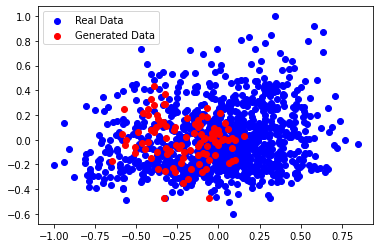

32/32 [==============================] - 0s 2ms/step
0.1579872471769227
Epoch 100, D Loss: 0.607073649764061, G Loss: 1.074908971786499
4/4 [==============================] - 0s 2ms/step


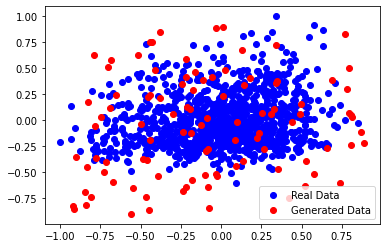

32/32 [==============================] - 0s 1ms/step
0.18438749590395326
Epoch 200, D Loss: 0.5837923884391785, G Loss: 1.0734392404556274
4/4 [==============================] - 0s 2ms/step


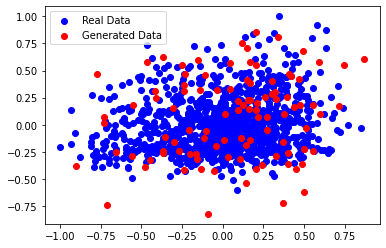

32/32 [==============================] - 0s 1ms/step
0.09604825902775393
Epoch 300, D Loss: 0.678907722234726, G Loss: 0.8567227125167847
4/4 [==============================] - 0s 2ms/step


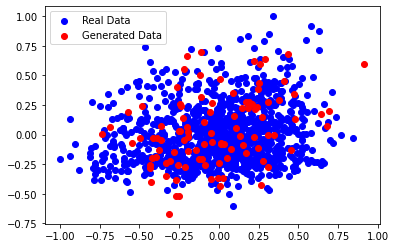

32/32 [==============================] - 0s 1ms/step
0.055010509535202624
Epoch 400, D Loss: 0.6873862147331238, G Loss: 0.7205140590667725
4/4 [==============================] - 0s 2ms/step


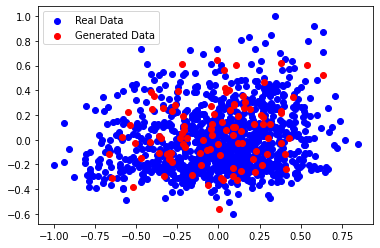

32/32 [==============================] - 0s 1ms/step
0.040315657991117616
Epoch 500, D Loss: 0.6909346580505371, G Loss: 0.6839788556098938
4/4 [==============================] - 0s 2ms/step


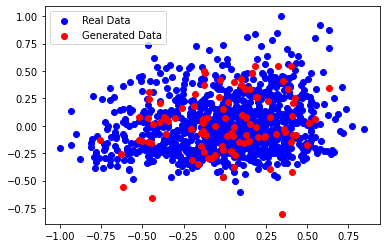

32/32 [==============================] - 0s 1ms/step
0.03299567937696055
Epoch 600, D Loss: 0.6703938245773315, G Loss: 0.676789402961731
4/4 [==============================] - 0s 2ms/step


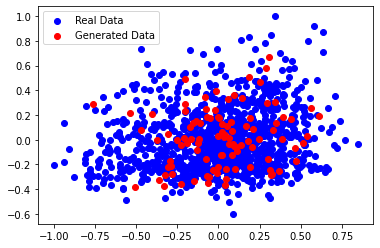

32/32 [==============================] - 0s 1ms/step
0.04022202101677685
Epoch 700, D Loss: 0.686708927154541, G Loss: 0.7104372978210449
4/4 [==============================] - 0s 2ms/step


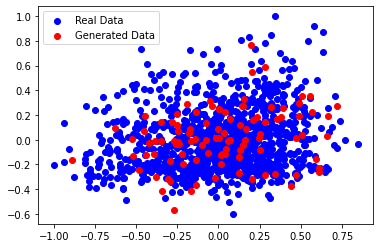

32/32 [==============================] - 0s 1ms/step
0.03582033030323643
Epoch 800, D Loss: 0.6730120778083801, G Loss: 0.6874583959579468
4/4 [==============================] - 0s 2ms/step


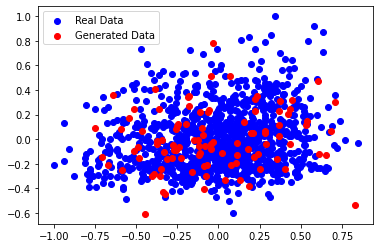

32/32 [==============================] - 0s 1ms/step
0.033422871970079995
Epoch 900, D Loss: 0.6791395545005798, G Loss: 0.688785195350647
4/4 [==============================] - 0s 2ms/step


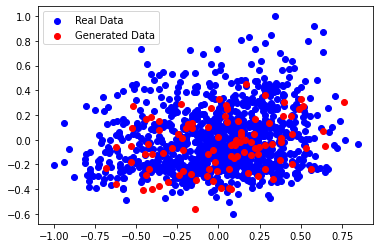

32/32 [==============================] - 0s 1ms/step
0.030193110724173584
Epoch 1000, D Loss: 0.6916419863700867, G Loss: 0.6875978112220764
4/4 [==============================] - 0s 2ms/step


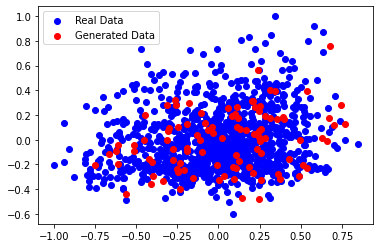

32/32 [==============================] - 0s 1ms/step
0.029134611374711857
Epoch 1100, D Loss: 0.6793920397758484, G Loss: 0.7043935060501099
4/4 [==============================] - 0s 2ms/step


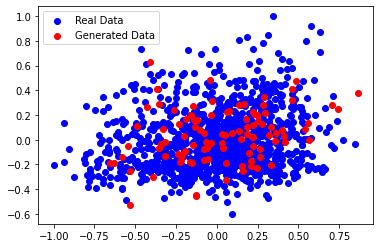

32/32 [==============================] - 0s 1ms/step
0.02942507973517016
Epoch 1200, D Loss: 0.6749283373355865, G Loss: 0.7045594453811646
4/4 [==============================] - 0s 2ms/step


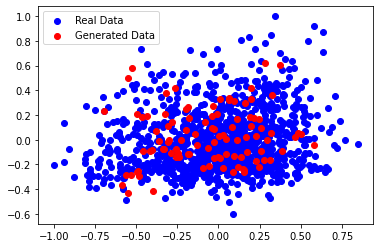

32/32 [==============================] - 0s 1ms/step
0.03189974409396627
Epoch 1300, D Loss: 0.6853514313697815, G Loss: 0.7219702005386353
4/4 [==============================] - 0s 2ms/step


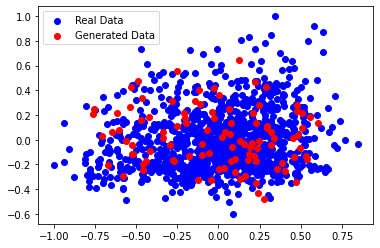

32/32 [==============================] - 0s 2ms/step
0.03220720067674546
Epoch 1400, D Loss: 0.6755225956439972, G Loss: 0.707952618598938
4/4 [==============================] - 0s 2ms/step


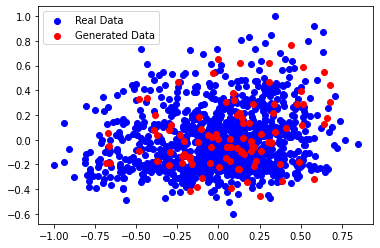

32/32 [==============================] - 0s 2ms/step
0.03333236940920291
Epoch 1500, D Loss: 0.6870368719100952, G Loss: 0.7166240215301514
4/4 [==============================] - 0s 2ms/step


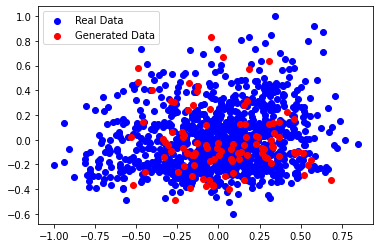

32/32 [==============================] - 0s 1ms/step
0.03409271009543248
Epoch 1600, D Loss: 0.6886869668960571, G Loss: 0.7097494602203369
4/4 [==============================] - 0s 2ms/step


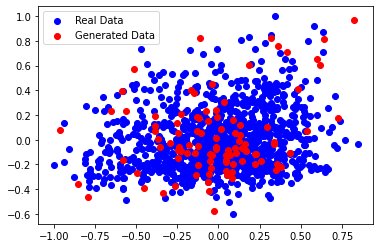

32/32 [==============================] - 0s 1ms/step
0.039506554418487015
Epoch 1700, D Loss: 0.6925131678581238, G Loss: 0.7120210528373718
4/4 [==============================] - 0s 2ms/step


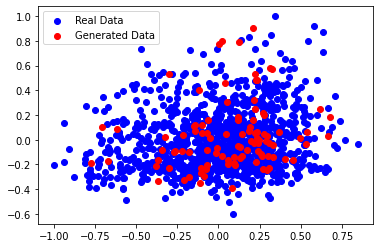

32/32 [==============================] - 0s 1ms/step
0.030759686258155096
Epoch 1800, D Loss: 0.6871257722377777, G Loss: 0.7186099290847778
4/4 [==============================] - 0s 2ms/step


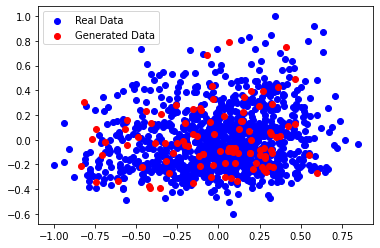

32/32 [==============================] - 0s 1ms/step
0.03370362906862358
Epoch 1900, D Loss: 0.6868902444839478, G Loss: 0.7027777433395386
4/4 [==============================] - 0s 2ms/step


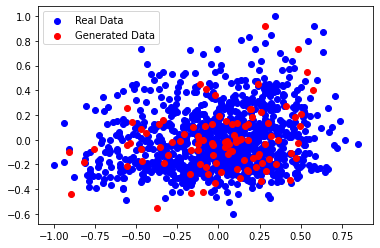

32/32 [==============================] - 0s 1ms/step
0.02202349579349151
Epoch 2000, D Loss: 0.6866909861564636, G Loss: 0.7090519666671753
4/4 [==============================] - 0s 2ms/step


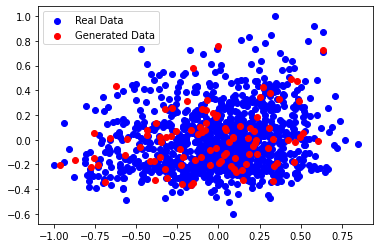

32/32 [==============================] - 0s 1ms/step
0.030628781378846927
Epoch 2100, D Loss: 0.6930771470069885, G Loss: 0.6978311538696289
4/4 [==============================] - 0s 2ms/step


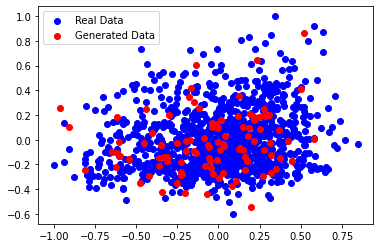

32/32 [==============================] - 0s 1ms/step
0.02508509526773105
Epoch 2200, D Loss: 0.6894540190696716, G Loss: 0.7043306827545166
4/4 [==============================] - 0s 2ms/step


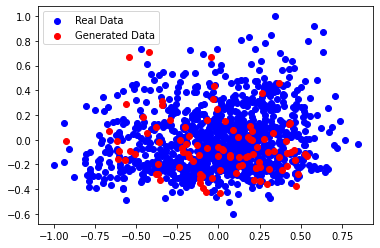

32/32 [==============================] - 0s 1ms/step
0.028817539379287622
Epoch 2300, D Loss: 0.6847201883792877, G Loss: 0.6854586601257324
4/4 [==============================] - 0s 2ms/step


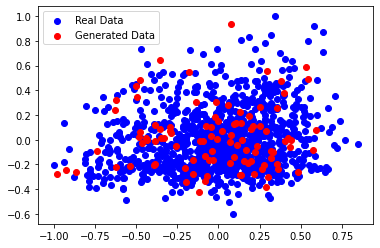

32/32 [==============================] - 0s 2ms/step
0.02429671409441741
Epoch 2400, D Loss: 0.6854606866836548, G Loss: 0.7182843685150146
4/4 [==============================] - 0s 2ms/step


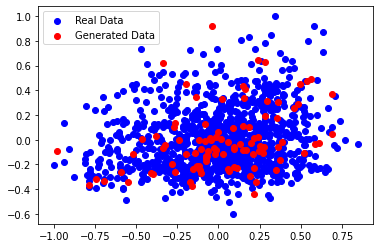

32/32 [==============================] - 0s 1ms/step
0.02985395331621652
Epoch 2500, D Loss: 0.6823829114437103, G Loss: 0.6921113729476929
4/4 [==============================] - 0s 2ms/step


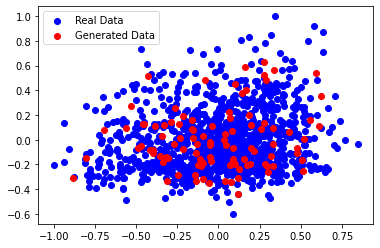

32/32 [==============================] - 0s 2ms/step
0.02708949683897331
Epoch 2600, D Loss: 0.6906536817550659, G Loss: 0.7183852195739746
4/4 [==============================] - 0s 2ms/step


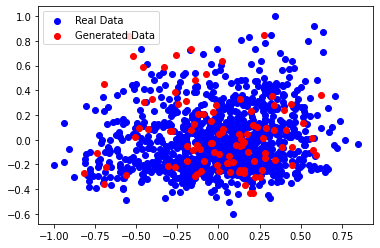

32/32 [==============================] - 0s 2ms/step
0.03541910029355728
Epoch 2700, D Loss: 0.6882612109184265, G Loss: 0.7100922465324402
4/4 [==============================] - 0s 2ms/step


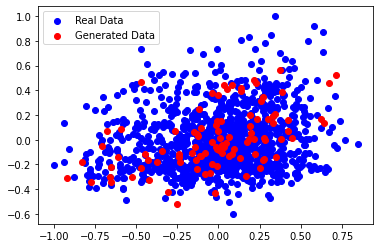

32/32 [==============================] - 0s 1ms/step
0.035840425075494606
Epoch 2800, D Loss: 0.686963677406311, G Loss: 0.7205013036727905
4/4 [==============================] - 0s 2ms/step


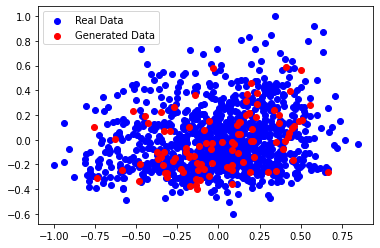

32/32 [==============================] - 0s 1ms/step
0.03501330863985218
Epoch 2900, D Loss: 0.6930801272392273, G Loss: 0.7055050134658813
4/4 [==============================] - 0s 2ms/step


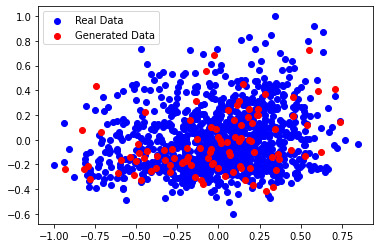

32/32 [==============================] - 0s 1ms/step
0.024281200642686313
Epoch 3000, D Loss: 0.6898413896560669, G Loss: 0.7099463939666748
4/4 [==============================] - 0s 2ms/step


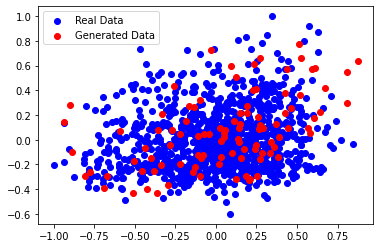

32/32 [==============================] - 0s 1ms/step
0.03692741995120888
Epoch 3100, D Loss: 0.6889001727104187, G Loss: 0.7050547003746033
4/4 [==============================] - 0s 1ms/step


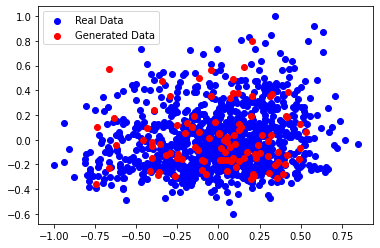

32/32 [==============================] - 0s 2ms/step
0.028240260789830923
Epoch 3200, D Loss: 0.6854583919048309, G Loss: 0.7141976356506348
4/4 [==============================] - 0s 2ms/step


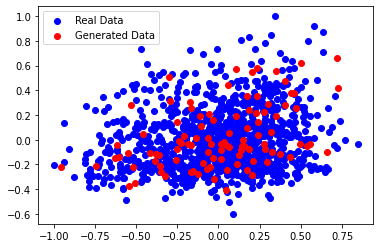

32/32 [==============================] - 0s 2ms/step
0.032843569742367594
Epoch 3300, D Loss: 0.6839089393615723, G Loss: 0.7107542753219604
4/4 [==============================] - 0s 2ms/step


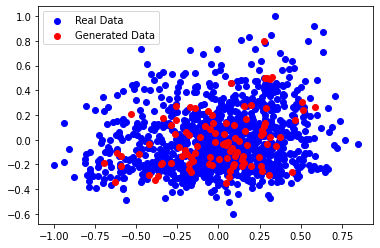

32/32 [==============================] - 0s 1ms/step
0.03145403217735677
Epoch 3400, D Loss: 0.6970292925834656, G Loss: 0.709520697593689
4/4 [==============================] - 0s 2ms/step


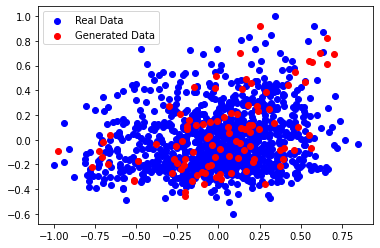

32/32 [==============================] - 0s 2ms/step
0.028311048392011505
Epoch 3500, D Loss: 0.6925339102745056, G Loss: 0.6991446018218994
4/4 [==============================] - 0s 1ms/step


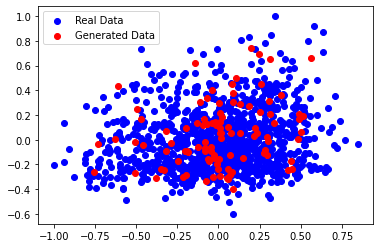

32/32 [==============================] - 0s 1ms/step
0.03634793559096172
Epoch 3600, D Loss: 0.6934233605861664, G Loss: 0.7169287204742432
4/4 [==============================] - 0s 2ms/step


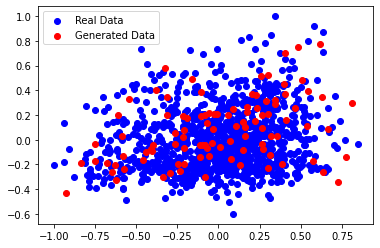

32/32 [==============================] - 0s 1ms/step
0.03919045653901421
Epoch 3700, D Loss: 0.6873302757740021, G Loss: 0.698889434337616
4/4 [==============================] - 0s 2ms/step


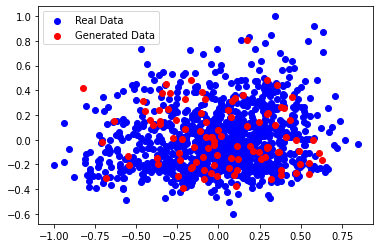

32/32 [==============================] - 0s 2ms/step
0.03633199022168347
Epoch 3800, D Loss: 0.6884020268917084, G Loss: 0.7046195268630981
4/4 [==============================] - 0s 2ms/step


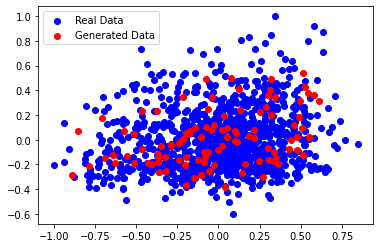

32/32 [==============================] - 0s 1ms/step
0.04237650612369047
Epoch 3900, D Loss: 0.6871809363365173, G Loss: 0.7347809672355652
4/4 [==============================] - 0s 2ms/step


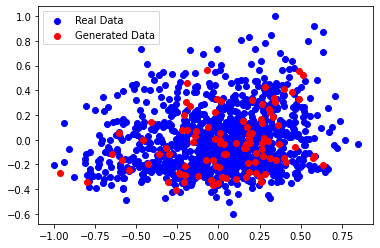

32/32 [==============================] - 0s 2ms/step
0.036438717907866666
Epoch 4000, D Loss: 0.6804068088531494, G Loss: 0.7215854525566101
4/4 [==============================] - 0s 2ms/step


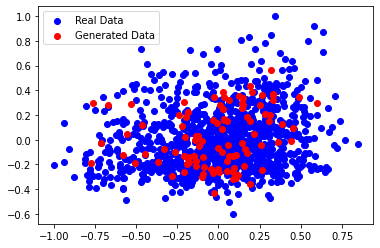

32/32 [==============================] - 0s 1ms/step
0.03525541846366537
Epoch 4100, D Loss: 0.692458987236023, G Loss: 0.718990683555603
4/4 [==============================] - 0s 2ms/step


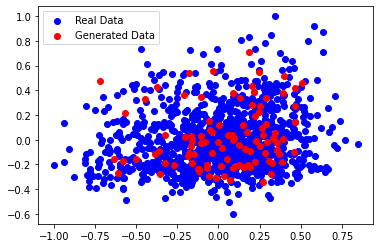

32/32 [==============================] - 0s 2ms/step
0.03589418387592895
Epoch 4200, D Loss: 0.6902612745761871, G Loss: 0.7296075820922852
4/4 [==============================] - 0s 2ms/step


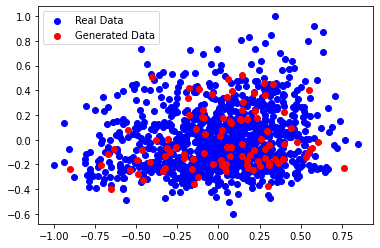

32/32 [==============================] - 0s 2ms/step
0.033942872950946425
Epoch 4300, D Loss: 0.6871344447135925, G Loss: 0.7269326448440552
4/4 [==============================] - 0s 2ms/step


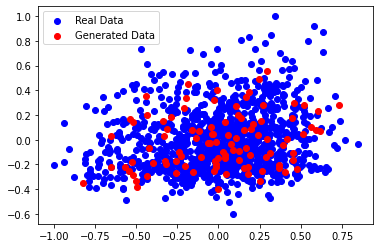

32/32 [==============================] - 0s 1ms/step
0.0321574163375214
Epoch 4400, D Loss: 0.6822083592414856, G Loss: 0.7148334383964539
4/4 [==============================] - 0s 2ms/step


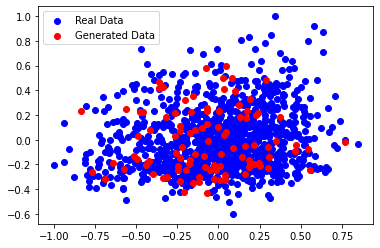

32/32 [==============================] - 0s 2ms/step
0.05026943457917634
Epoch 4500, D Loss: 0.6909458041191101, G Loss: 0.7052942514419556
4/4 [==============================] - 0s 2ms/step


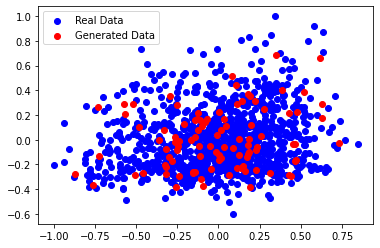

32/32 [==============================] - 0s 1ms/step
0.0314791554938416
Epoch 4600, D Loss: 0.6848360300064087, G Loss: 0.7468173503875732
4/4 [==============================] - 0s 2ms/step


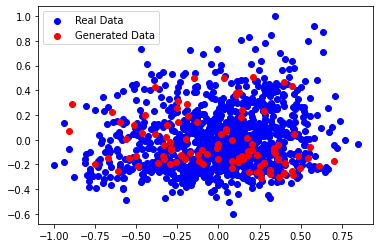

32/32 [==============================] - 0s 2ms/step
0.04941881619374901
Epoch 4700, D Loss: 0.6891653835773468, G Loss: 0.7075625658035278
4/4 [==============================] - 0s 2ms/step


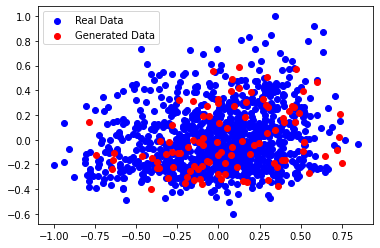

32/32 [==============================] - 0s 2ms/step
0.03822833080350172
Epoch 4800, D Loss: 0.6780254244804382, G Loss: 0.7054097652435303
4/4 [==============================] - 0s 2ms/step


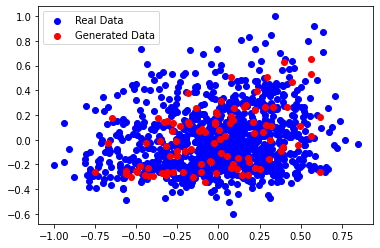

32/32 [==============================] - 0s 2ms/step
0.03266548467414255
Epoch 4900, D Loss: 0.6721075773239136, G Loss: 0.7089846134185791
4/4 [==============================] - 0s 2ms/step


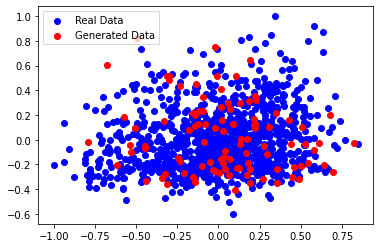

32/32 [==============================] - 0s 2ms/step
0.050341001488115676


In [49]:
savlossD = []
savlossG = []
savlossW = []

# Training loop
for epoch in range(epochs):
    # Train discriminator
    with HiddenPrints():
        idx = np.random.randint(0, real_data.shape[0], batch_size)
        real_samples = real_data[idx]
        noise = generate_noise(batch_size, latent_dim)
        fake_samples = generator.predict(noise)
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator
        noise = generate_noise(batch_size, latent_dim)
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Print progress and plot generated data
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")
        savlossD.append(d_loss[0])
        savlossG.append(g_loss)
        generated_data = generate_data(generator, 100, latent_dim)
        plot_generated_data(real_data, generated_data)
        generated_data = generate_data(generator, 1000, latent_dim)
        w = dist(real_data, generated_data)
        savlossW.append(w)
        print(w)


## results

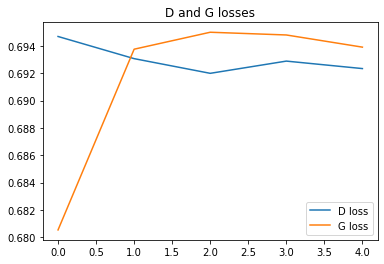

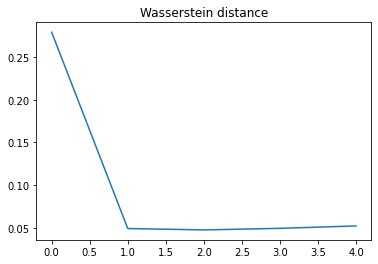

In [185]:
plt.plot(savlossD,label="D loss")
plt.plot(savlossG,label="G loss")
plt.legend()
plt.title("D and G losses")
plt.show()
plt.plot(savlossW)
plt.title("Wasserstein distance")
plt.show()

In [57]:
bestepochs = 1900

# Training loop
for epoch in range(bestepochs):
    # Train discriminator
    with HiddenPrints():
        _original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')
        idx = np.random.randint(0, real_data.shape[0], batch_size)
        real_samples = real_data[idx]
        noise = generate_noise(batch_size, latent_dim)
        fake_samples = generator.predict(noise)
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator
        noise = generate_noise(batch_size, latent_dim)
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Print progress and plot generated data
    if epoch % 100 == 0:
        print(str(100*epoch/bestepochs) + "%")


0.0%
5.2631578947368425%
10.526315789473685%
15.789473684210526%
21.05263157894737%
26.31578947368421%
31.57894736842105%
36.8421052631579%
42.10526315789474%
47.36842105263158%
52.63157894736842%
57.89473684210526%
63.1578947368421%
68.42105263157895%
73.6842105263158%
78.94736842105263%
84.21052631578948%
89.47368421052632%
94.73684210526316%


In [58]:
generator.save("generator_model.h5")

c:\Users\matth\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the saved generator model
loaded_generator = load_model("generator_model.h5")

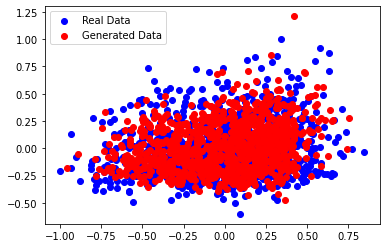

0.045070045438755334


In [173]:
generated_data = generate_data(generator, 1000, latent_dim)
plot_generated_data(Y_corrected, generated_data)
print(dist(Y_corrected, generated_data))

In [174]:
generated_data_cent = generated_data * np.max(abs(Y_centered), axis=0)
gendata_corrected = generated_data_cent + np.mean(Y, axis=0)
gendata_corrected = np.maximum(gendata_corrected, 0)

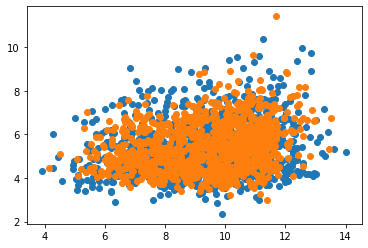

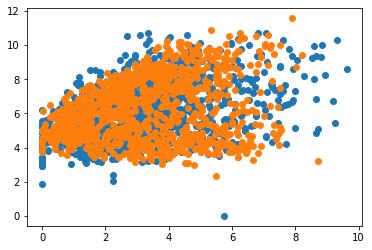

In [175]:
plt.plot(Y[:,0], Y[:,1], 'o')
plt.plot(gendata_corrected[:,0], gendata_corrected[:,1], 'o')
plt.show()
plt.plot(Y[:,2], Y[:,3], 'o')
plt.plot(gendata_corrected[:,2], gendata_corrected[:,3], 'o')
plt.show()

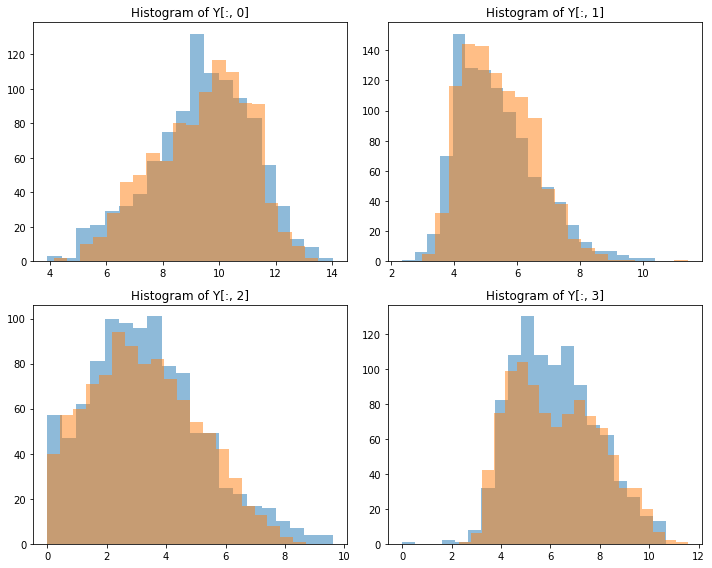

In [176]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].hist(Y[:, 0], bins=20,alpha=0.5)
axs[0, 0].hist(gendata_corrected[:, 0], bins=20,alpha=0.5)
axs[0, 0].set_title('Histogram of Y[:, 0]')

axs[0, 1].hist(Y[:, 1], bins=20,alpha=0.5)
axs[0, 1].hist(gendata_corrected[:, 1], bins=20,alpha=0.5)
axs[0, 1].set_title('Histogram of Y[:, 1]')

axs[1, 0].hist(Y[:, 2], bins=20,alpha=0.5)
axs[1, 0].hist(gendata_corrected[:, 2], bins=20,alpha=0.5)
axs[1, 0].set_title('Histogram of Y[:, 2]')

axs[1, 1].hist(Y[:, 3], bins=20,alpha=0.5)
axs[1, 1].hist(gendata_corrected[:, 3], bins=20,alpha=0.5)
axs[1, 1].set_title('Histogram of Y[:, 3]')

plt.tight_layout()
plt.show()

# LOSS

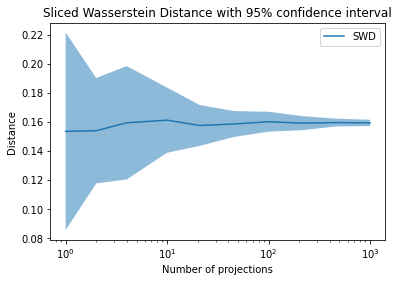

In [90]:
n = len(Y)
n_seed = 20
n_projections_arr = np.logspace(0, 3, 10, dtype=int)
res = np.empty((n_seed, 10))

a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples

for seed in range(n_seed):
    for i, n_projections in enumerate(n_projections_arr):
        res[seed, i] = ot.sliced_wasserstein_distance(Y, gendata_corrected, a, b, n_projections, seed=seed)

res_mean = np.mean(res, axis=0)
res_std = np.std(res, axis=0)

plt.figure(2)
plt.plot(n_projections_arr, res_mean, label="SWD")
plt.fill_between(n_projections_arr, res_mean - 2 * res_std, res_mean + 2 * res_std, alpha=0.5)

plt.legend()
plt.xscale('log')

plt.xlabel("Number of projections")
plt.ylabel("Distance")
plt.title('Sliced Wasserstein Distance with 95% confidence interval')

plt.show()